# K-means clustering on live data
## Aim: To implement K-means clustering and to find intrinsic groups within the dataset that display the same status type behaviour( Video,photos, status and links).
## concept: The k-means clustering depend upon finding the number of clusters and data laberls for pre-defined values of k. To find the number of clusterin the data we need to run k-means clustering algorithm for different values of k and compare the results. Therefore the performance of the algorithm depends upon the value of k. We should choose the optimal value of k that gives the best result. The most common technique for this is elbow method(mcq).

In [1]:
#4 cluster 5 elbow 5 try with all cluster 7 go for good accuracy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\\Users\\admin\\Downloads\\Live - Live.csv")

In [6]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [8]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [9]:
len(df)


7050

In [10]:
new_df = df.drop(['Column1','Column2','Column3','Column4','status_id'],axis=1)


In [11]:
new_df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [12]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [14]:
new_df.nunique()

status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [15]:
len(new_df['status_published'].unique())

6913

In [16]:
new_df = new_df.drop('status_published',axis=1)

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the 'status_type' column and store it in the DataFrame
new_df['status_type_encoded'] = le.fit_transform(new_df['status_type'])

# Define X (features) and y (target)
X = new_df.drop(columns=['status_type', 'status_type_encoded'])  # Drop the original and encoded target column
y = new_df['status_type_encoded']  # Use the encoded target column as y

In [20]:
new_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_encoded
0,3,529,512,262,432,92,3,1,1,0,3
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,3
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   status_type          7050 non-null   int32
 1   num_reactions        7050 non-null   int64
 2   num_comments         7050 non-null   int64
 3   num_shares           7050 non-null   int64
 4   num_likes            7050 non-null   int64
 5   num_loves            7050 non-null   int64
 6   num_wows             7050 non-null   int64
 7   num_hahas            7050 non-null   int64
 8   num_sads             7050 non-null   int64
 9   num_angrys           7050 non-null   int64
 10  status_type_encoded  7050 non-null   int64
dtypes: int32(1), int64(10)
memory usage: 578.4 KB


In [22]:
# 22 FEB 2025
# read about freshworkds and create multiple models and visualize it using freshworkds

In [23]:
# 24 feb 2025
# elbow method does not guarantee accuracy (mcq)



## K-means model with two clusters

In [24]:
kmeans =KMeans(n_clusters=3,random_state=42)

In [25]:
kmeans.fit(new_df)

KMeans(n_clusters=3, random_state=42)

In [26]:
kmeans.cluster_centers_

array([[1.66884430e+00, 1.13000000e+02, 1.08951003e+02, 2.47901695e+01,
        1.03412350e+02, 8.33551097e+00, 5.78783637e-01, 4.09706020e-01,
        1.82454503e-01, 7.82392285e-02, 1.66884430e+00],
       [2.98540146e+00, 4.86737226e+02, 5.30959124e+03, 4.80408759e+02,
        3.76072993e+02, 9.50729927e+01, 4.80291971e+00, 7.39416058e+00,
        2.51824818e+00, 8.75912409e-01, 2.98540146e+00],
       [1.82231405e+00, 1.71315289e+03, 3.17871901e+02, 1.17700413e+02,
        1.65226033e+03, 4.77747934e+01, 9.73347107e+00, 2.60950413e+00,
        4.13223140e-01, 3.61570248e-01, 1.82231405e+00]])

In [27]:
y = kmeans.labels_

In [28]:
kmeans.inertia_

2735269906.430087

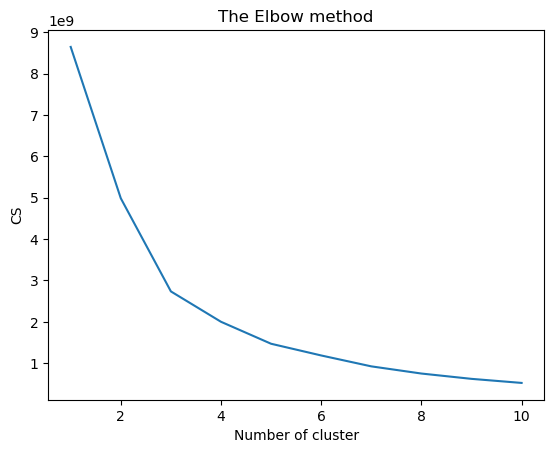

In [29]:
cs  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,max_iter=300,n_init= 30)
    kmeans.fit(new_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title("The Elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("CS")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=2,random_state=100)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(labels == y)
print("Result: ", correct_labels, "out of ",y.size,"were correctly labeled")
print("Accuracy score: ", correct_labels/y.size)


Result:  6565 out of  7050 were correctly labeled
Accuracy score:  0.9312056737588652


In [31]:
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(labels == y)
print("Result: ", correct_labels, "out of ",y.size,"were correctly labeled")
print("Accuracy score: ", correct_labels/y.size)


Result:  7048 out of  7050 were correctly labeled
Accuracy score:  0.9997163120567376


In [32]:
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(labels == y)
print("Result: ", correct_labels, "out of ",y.size,"were correctly labeled")
print("Accuracy score: ", correct_labels/y.size)


Result:  6724 out of  7050 were correctly labeled
Accuracy score:  0.953758865248227


In [33]:
kmeans = KMeans(n_clusters=6,random_state=100)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(labels == y)
print("Result: ", correct_labels, "out of ",y.size,"were correctly labeled")
print("Accuracy score: ", correct_labels/y.size)


Result:  6278 out of  7050 were correctly labeled
Accuracy score:  0.8904964539007092
